importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

importint dataset and dividing into training and testing 

In [2]:
data = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = data[data['Date']<'2019-01-01'].copy()
training_set = training_set.drop(['Date', 'Adj Close', 'High', 'Low', 'Close', 'Volume'], axis = 1)
data_test = data[data['Date']>='2019-01-01'].copy()
data_test = data_test.drop(['Date', 'Adj Close', 'High', 'Low', 'Close', 'Volume'], axis = 1)

feature scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[3.30294890e-04],
       [7.42148227e-04],
       [4.71386886e-03],
       ...,
       [7.92197108e-01],
       [8.18777193e-01],
       [8.19874096e-01]])

creating with 60 timestamps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, training_set_scaled.shape[0]):
    X_train.append(training_set_scaled[i-60:i])
    y_train.append(training_set_scaled[i,0])
    
X_train,y_train = np.array(X_train),np.array(y_train)

In [5]:
X_train.shape

(3557, 60, 1)

#building the RNN

importing the keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

initialising the RNN 

In [7]:
regressor = Sequential()

adding the first LSTM layer and dropout regularization

In [8]:
regressor.add(LSTM(units = 50,activation="relu", return_sequences = True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))


In [9]:
#adding second LSTM layer with dropout regularization

regressor.add(LSTM(units=60, activation="relu", return_sequences = True))
regressor.add(Dropout(0.2))

#adding the third LSTM layer and dropout regularization

regressor.add(LSTM(units=80, activation="relu", return_sequences = True))
regressor.add(Dropout(0.2))

#adding the fourth LSTM layer and dropout regularization

regressor.add(LSTM(units=120, activation="relu", return_sequences = False))
regressor.add(Dropout(0.2))

adding the output layer

In [10]:
regressor.add(Dense(units=1))

In [11]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

compiling the RNN

In [12]:
regressor.compile(optimizer = "adam", loss="mean_squared_error", metrics=[tf.keras.metrics.Accuracy()])


fitting the RNN to the training set

In [13]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
112/112 [==============================] - 22s 154ms/step - loss: 0.0148 - accuracy: 0.0000e+00
Epoch 2/100
112/112 [==============================] - 17s 154ms/step - loss: 0.0024 - accuracy: 0.0000e+00
Epoch 3/100
112/112 [==============================] - 17s 152ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 4/100
112/112 [==============================] - 19s 169ms/step - loss: 0.0018 - accuracy: 0.0000e+00
Epoch 5/100
112/112 [==============================] - 17s 153ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 6/100
112/112 [==============================] - 17s 153ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 7/100
112/112 [==============================] - 17s 152ms/step - loss: 0.0015 - accuracy: 0.0000e+00
Epoch 8/100
112/112 [==============================] - 17s 153ms/step - loss: 0.0017 - accuracy: 0.0000e+00
Epoch 9/100
112/112 [==============================] - 17s 153ms/step - loss: 0.0016 - accuracy: 0.0000e+00
Epoch 10/100
112/112 [======

getting the data for testing

In [14]:
past_60_days = training_set.tail(60)

df = past_60_days.append(data_test, ignore_index = True)
df.head()

,Open
0,1195.329956
1,1167.500000
2,1150.109985
3,1146.150024
4,1131.079956


In [15]:
inputs = sc.transform(df)
inputs

array([[0.93805611],
       [0.91527437],
       [0.90103881],
       [0.89779717],
       [0.88546073],
       [0.83786702],
       [0.86656736],
       [0.86731232],
       [0.86377589],
       [0.88167878],
       [0.87789683],
       [0.85459117],
       [0.8625235 ],
       [0.84437499],
       [0.8634976 ],
       [0.8369257 ],
       [0.80847098],
       [0.84566835],
       [0.78508343],
       [0.82711883],
       [0.84020832],
       [0.83851375],
       [0.82318129],
       [0.81047652],
       [0.83464176],
       [0.85296215],
       [0.8387266 ],
       [0.82841219],
       [0.81359546],
       [0.81908827],
       [0.81475781],
       [0.82679137],
       [0.82498218],
       [0.77815801],
       [0.80824994],
       [0.80271616],
       [0.8095515 ],
       [0.81172082],
       [0.8180732 ],
       [0.84043745],
       [0.85107113],
       [0.87896106],
       [0.86257257],
       [0.80620343],
       [0.82728251],
       [0.80685016],
       [0.82440101],
       [0.833

In [16]:
X_test = []
y_test=[]

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [17]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((192, 60, 1), (192,))

In [18]:
predicted_stock_price = regressor.predict(X_test)

Inverse transform to scale it back

In [19]:
# sc.scale_
scale = 1/8.18605127e-04
scale

1221.5901990069017

In [20]:
predicted_stock_price = predicted_stock_price*scale
real_stock_price = y_test*scale

visualizing the results

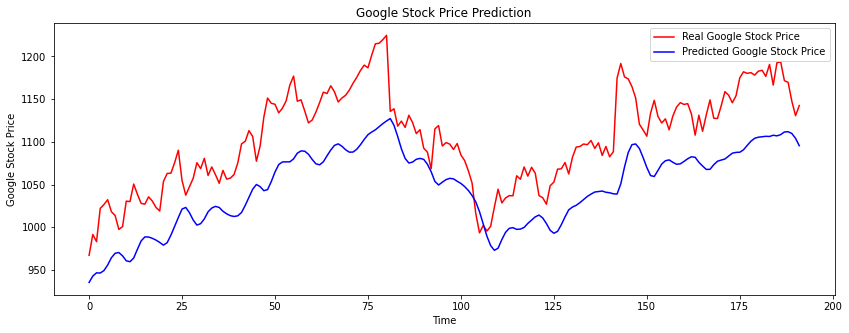

In [21]:
plt.figure(figsize=(14,5))
plt.plot(real_stock_price, color="red", label="Real Google Stock Price")
plt.plot(predicted_stock_price, color="blue", label="Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

RMSE

In [22]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))

print(rmse)

61.81370575779104
